# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [105]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

In [106]:
con = mysql.connector.connect(user='root', password='Temp1234%',
                              host='127.0.0.1',
                              database='employees')

In [107]:
import pandas as pd
import numpy as np

In [108]:
import matplotlib.pyplot as plt

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [5]:
cursor = con.cursor()
sql = """
SELECT max(hire_date), min(hire_date)
FROM employees
"""

In [7]:
cursor.execute(sql)

In [8]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

In [9]:
cursor.close()

True

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [109]:
cursor = con.cursor()
query = """

SELECT emp_no, salary, from_date, to_date
FROM salaries
WHERE (emp_no, to_date, from_date) IN (
    SELECT emp_no, MAX(to_date), max(from_date)
    FROM salaries
    GROUP BY emp_no
)
ORDER BY emp_no;
"""

In [110]:
cursor.execute(query)

In [111]:
results = cursor.fetchall()

In [112]:
field_names = [i[0] for i in cursor.description]

In [113]:
res = pd.DataFrame(results, columns=field_names)

In [114]:
display(res.head(3), res.columns, res.shape)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

(300024, 4)

In [115]:
cursor.close()

True

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [116]:
print(res['to_date'].dtype)

object


In [117]:
res['to_date'] = res['to_date'].astype("string")

In [118]:
count_9999 = res[res.to_date=='9999-01-01']['to_date'].count()
count_not_9999 = res[res.to_date !='9999-01-01']['to_date'].count()

In [119]:
print(f"Кількість даних з датою '9999-01-01': {count_9999}") 
print(f"Кількість даних з іншою датою : {count_not_9999}") 

Кількість даних з датою '9999-01-01': 240124
Кількість даних з іншою датою : 59900


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

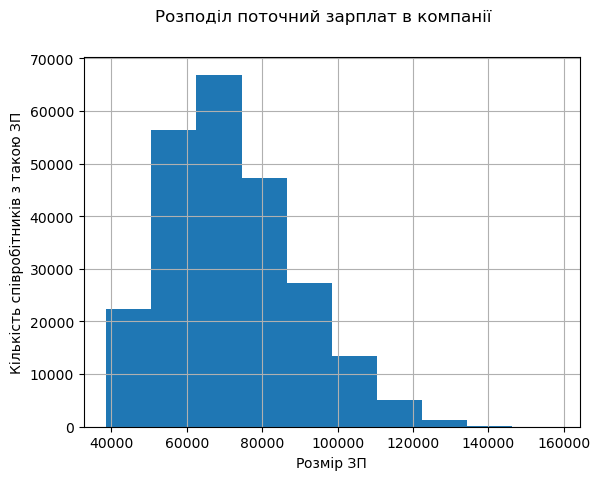

In [120]:
res[res.to_date=='9999-01-01'].salary.hist()
plt.suptitle("Розподіл поточний зарплат в компанії")
plt.xlabel("Poзмір ЗП")
plt.ylabel("Кількість співробітників з такою ЗП");

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [121]:
con.close()